## Part 1: Data Comprehension

In [38]:
# Data Manipulation
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Formatting 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Importing Data
Importing data from the provided [data source](https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021)

In [39]:
draft_data = pd.read_csv('nbaplayersdraft.csv')
draft_data.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,3170.0,691.0,0.510,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,2550.0,1185.0,0.446,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,3204.0,1897.0,0.465,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,4387.0,2097.0,0.456,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,3381.0,639.0,0.472,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


#### Preprocess data
I'm going to do a quick cleaning of that data - basically just changing some of the team names and filling in missing values in 'college'.

In [40]:
# I changed the missing values in college to 'No College'. 
# I assummed that the players who didn't attend college came straight from high school, played in the
# G-League, or are from another country

draft_data['college'].fillna('No College', inplace = True)

# Since some teams have changed names and moved cities so I'm going to try and combine the franchises.
# Combining teams
draft_data['team_'] = draft_data['team']

teams_dict = {'NOH' : 'NOP', 'NOK' : 'NOP', 
              'NJN' : 'BKN', 'BRK' : 'BKN', 
              'CHH' : 'CHA', 'CHO' : 'CHA', 
              'VAN' : 'MEM', 
              'WSB' : 'WAS', 
              'SEA' : 'OKC'}

draft_data.replace({'team_': teams_dict},inplace=True)

# Saving preprocessed data
draft_data.to_csv('draft_data.csv', index = False)

### 1.A 
Which NBA team(s) has drafted the most players who...
- a. went to Duke and were drafted in or before the 2000 draft?
- b. have a first name that begins with D and were drafted in an even year draft (1990, 1992, 1994, ...)?

**1.A.a**
Which NBA team(s) has drafted the most players who...
- a. went to Duke and were drafted in or before the 2000 draft?

In [41]:
duke_draft = draft_data[(draft_data['year'] <= 2000) & (draft_data['college'] == 'Duke')]
duke_draft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,team_
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,2550.0,1185.0,0.446,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,LAC
78,79,1990,25,25,POR,Alaa Abdelnaby,Duke,5.0,256.0,3200.0,1465.0,846.0,85.0,0.502,0.000,0.701,12.5,5.7,3.3,0.3,4.8,0.072,-3.8,-1.5,POR
102,103,1990,49,49,DAL,Phil Henderson,Duke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAL
164,165,1992,3,3,MIN,Christian Laettner,Duke,13.0,868.0,25760.0,11121.0,5806.0,2224.0,0.480,0.261,0.820,29.7,12.8,6.7,2.6,64.9,0.121,1.0,19.5,MIN
209,210,1992,48,48,PHO,Brian Davis,Duke,1.0,68.0,374.0,131.0,55.0,22.0,0.317,0.333,0.735,5.5,1.9,0.8,0.3,0.0,0.000,-4.7,-0.3,PHO


In [42]:
top_teams = duke_draft.groupby(['team_']).size().reset_index().rename(columns={0:'count'})
top_teams.sort_values(['count'], ascending = False).head()

,team_,count
3,DAL,2
8,MIN,2
10,PHO,2
0,ATL,1
1,CHI,1


Using the original data set, the teams that drafted the most Duke players before the year 2000 were DAL, MIN, and PHO, all with 2 each. 

**1. A. b**
Which NBA team(s) has drafted the most players who...
- b. have a first name that begins with D and were drafted in an even year draft (1990, 1992, 1994, ...)?

In [43]:
even_years = draft_data[draft_data['year'] % 2 == 0]
name_d = [x.title() for x in even_years['player'] if x.startswith('D')]
name_d_list = list(name_d)

player_names = draft_data.loc[draft_data['player'].isin(name_d_list)]
player_names.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,team_
54,55,1990,1,1,NJN,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3,BKN
57,58,1990,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9,ORL
68,69,1990,15,15,MIA,Dave Jamerson,Ohio University,3.0,90.0,594.0,306.0,77.0,61.0,0.392,0.277,0.860,6.6,3.4,0.9,0.7,0.2,0.018,-3.9,-0.3,MIA
71,72,1990,18,18,SAC,Duane Causwell,Temple,11.0,541.0,9409.0,2648.0,2273.0,243.0,0.507,0.286,0.618,17.4,4.9,4.2,0.4,15.8,0.081,-2.3,-0.7,SAC
72,73,1990,19,19,BOS,Dee Brown,Jacksonville University,12.0,608.0,16843.0,6758.0,1569.0,2227.0,0.436,0.357,0.825,27.7,11.1,2.6,3.7,33.4,0.095,0.8,11.6,BOS


In [44]:
even_year_name_starts_with_d = player_names.groupby(['team_']).size().reset_index().rename(columns={0:'count'})
even_year_name_starts_with_d.sort_values(['count'], ascending = False).head(5)

,team_,count
2,BOS,7
20,OKC,7
16,MIL,6
26,SAS,5
21,ORL,5


Boston and OKC/Seattle have drafted the most players (7 each) with a first name that begins with 'D' and were drafted during an even year. 

----
### 1.B
Describe the relationship between a team’s first round pick slot in one year with their first-round pick slot in the subsequent year.

In [45]:
# I started by filtering the data to just first round picks (1-30).
# Next, I included a performance metric to see if there was a correlation between that 
# and the next year's pick.

first_round = draft_data.loc[draft_data['overall_pick'] <= 30]
first_round = first_round[["year", "team_", "overall_pick"]]
first_round = first_round.drop_duplicates(["year", "team_"])

In [46]:
# I added columns for the previous year's pick and the next year's pick.
first_round['next_pick'] = first_round.groupby(['team_'])['overall_pick'].shift(-1)

In [47]:
atl = first_round.loc[first_round['team_'] == 'ATL']
atl['next_pick'] = first_round.groupby(['year'])['overall_pick'].shift(-1)

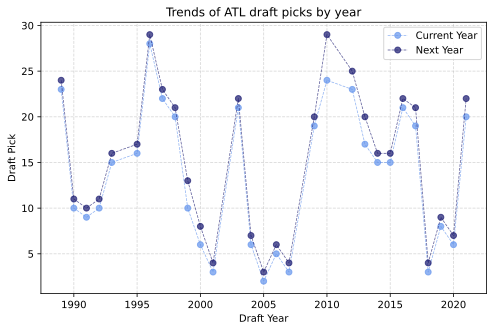

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
display.set_matplotlib_formats("svg")
x = atl["year"]
y1 = atl["overall_pick"]
y2 = atl["next_pick"]

plt.plot(x, y1, linestyle='--', marker='o', linewidth = 0.75, color = 'cornflowerblue', alpha=0.7, label='Current Year')
plt.plot(x, y2, linestyle='--', marker='o', linewidth = 0.75, color = 'midnightblue', alpha=0.7, label='Next Year')

ax.set_xlabel('Draft Year')
ax.set_ylabel('Draft Pick')
ax.set_title('Trends of ATL draft picks by year')
ax.grid(linestyle='--', alpha=0.5)

plt.legend(loc = 'upper right')
plt.show()

In [49]:
image_format = 'png'
image_name = 'draft.png'
fig.savefig(image_name, format=image_format)